In [186]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


from mpl_toolkits.mplot3d import Axes3D


In [143]:
df=pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [144]:
df.shape

(200, 5)

In [145]:
df.isnull().sum()


,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [146]:
df.duplicated().sum()


np.int64(0)

In [147]:

df = df.drop('CustomerID', axis=1)




In [148]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [149]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [150]:
df = df.rename(columns={
    'Annual Income (k$)': 'AnnualIncome',
    'Spending Score (1-100)': 'SpendingScore'
})


In [151]:

df.describe()


,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


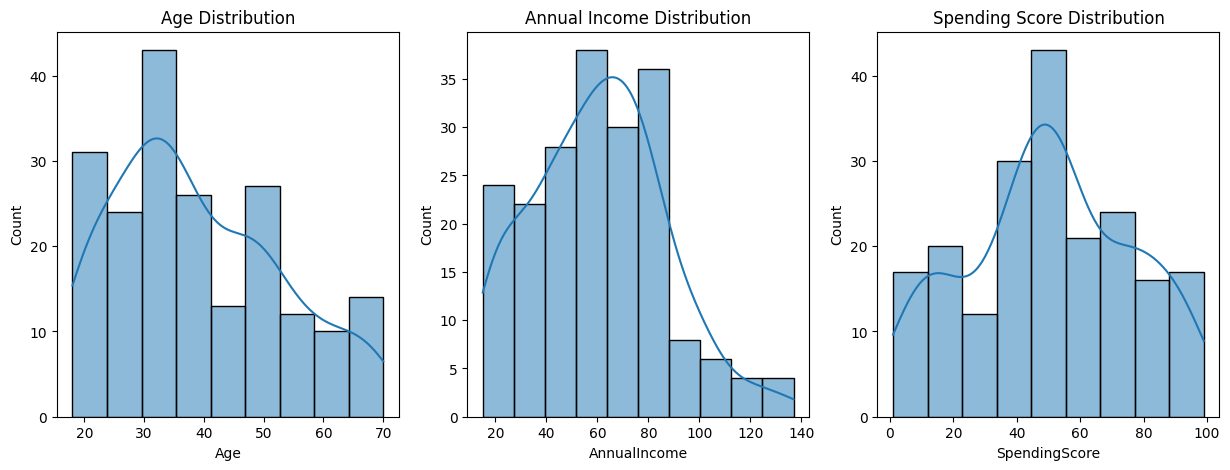

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(df['Age'], kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(df['AnnualIncome'], kde=True, ax=axes[1])
axes[1].set_title('Annual Income Distribution')

sns.histplot(df['SpendingScore'], kde=True, ax=axes[2])
axes[2].set_title('Spending Score Distribution')

plt.show()

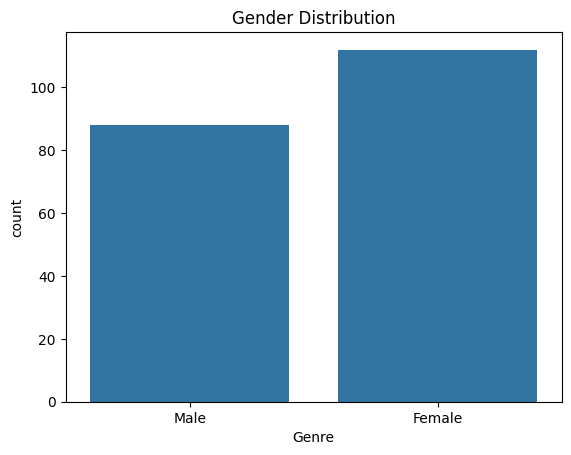

In [153]:
sns.countplot(x='Genre', data=df)
plt.title('Gender Distribution')
plt.show()

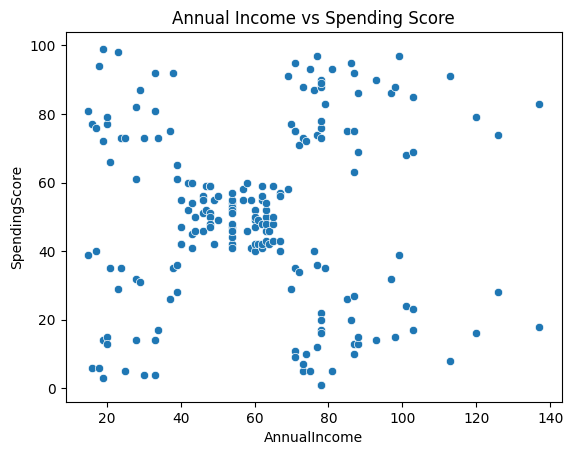

In [154]:
sns.scatterplot(
    data=df,
    x='AnnualIncome',
    y='SpendingScore'
)
plt.title('Annual Income vs Spending Score')
plt.show()

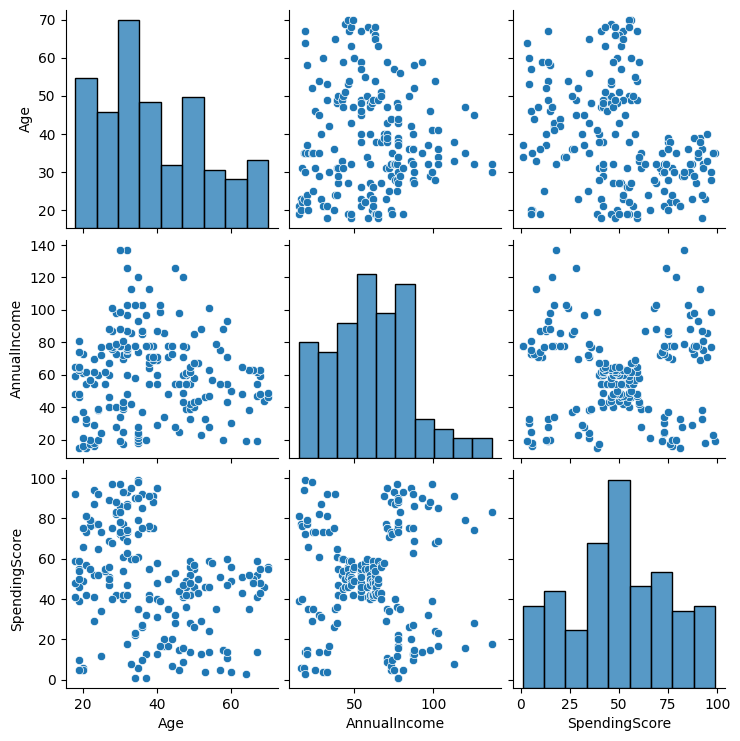

In [155]:
sns.pairplot(df)
plt.show()


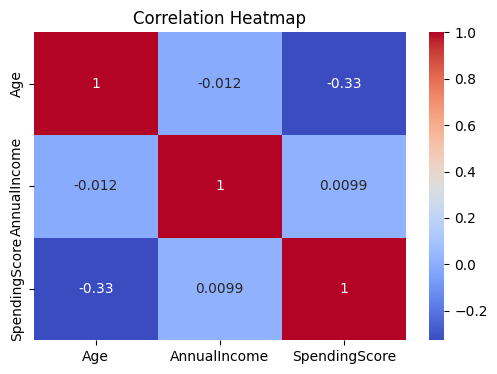

In [156]:
plt.figure(figsize=(6,4))
sns.heatmap(df.drop('Genre', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [157]:
X = df[['Age', 'AnnualIncome', 'SpendingScore']]
X

,Age,AnnualIncome,SpendingScore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [158]:
df['Genre'] = df['Genre'].astype(str).str.strip().str.capitalize()


In [159]:
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

In [160]:
df['Genre'].unique()


array([0, 1])

In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [162]:
X_scaled = scaler.fit_transform(X)


In [163]:
X_scaled[:5]


array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

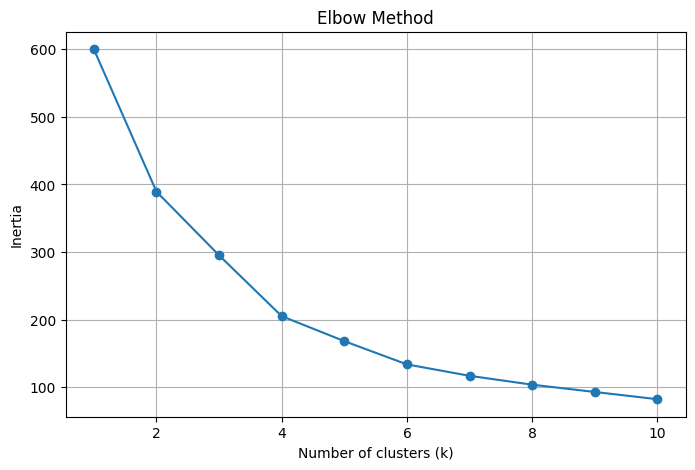

In [164]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
k_values = range(1, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [165]:
k = 4

km_final = KMeans(n_clusters=k, random_state=42, n_init=10)
df['cluster'] = km_final.fit_predict(X_scaled)


In [166]:
df['cluster'].value_counts().sort_index()



,count
cluster,
0,65
1,40
2,57
3,38


In [167]:
centroids_scaled = km_final.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)

centroid_df = pd.DataFrame(centroids_original, columns=['Age','AnnualIncome','SpendingScore'])
centroid_df.index.name = 'Cluster'
centroid_df


,Age,AnnualIncome,SpendingScore
Cluster,,,
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


In [168]:
cluster_summary=df.groupby('cluster')[['Age','AnnualIncome','SpendingScore']].mean()


In [169]:
cluster_summary

,Age,AnnualIncome,SpendingScore
cluster,,,
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


In [170]:
df['cluster'].value_counts().sort_index()


,count
cluster,
0,65
1,40
2,57
3,38


In [171]:
centroid_df


,Age,AnnualIncome,SpendingScore
Cluster,,,
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


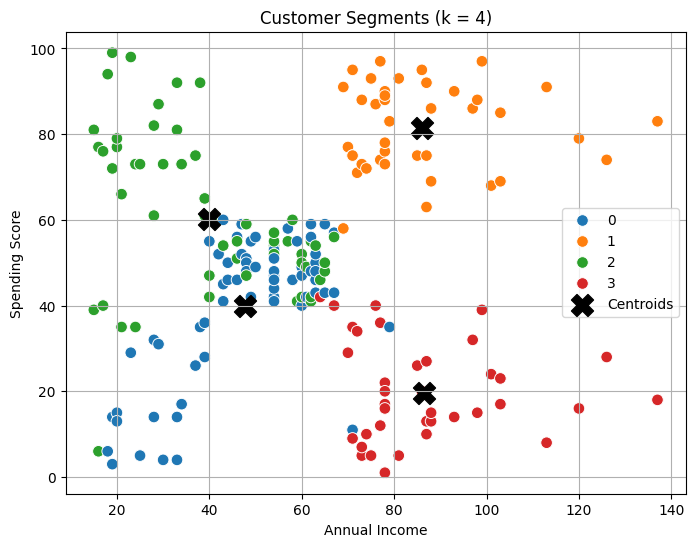

In [172]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df,
    x='AnnualIncome',
    y='SpendingScore',
    hue='cluster',
    palette='tab10',
    s=70
)

# Plot centroids
plt.scatter(
    centroid_df['AnnualIncome'],
    centroid_df['SpendingScore'],
    color='black',
    marker='X',
    s=250,
    label='Centroids'
)

plt.title('Customer Segments (k = 4)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid(True)
plt.show()


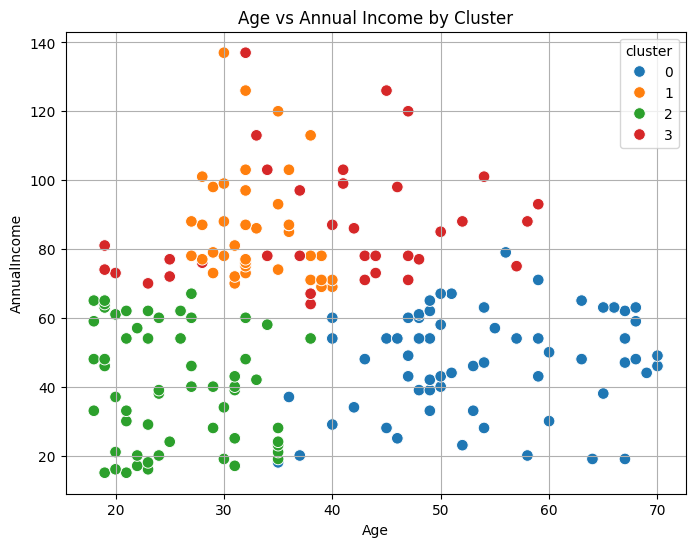

In [173]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Age',
    y='AnnualIncome',
    hue='cluster',
    palette='tab10',
    s=70
)
plt.title('Age vs Annual Income by Cluster')
plt.grid(True)
plt.show()


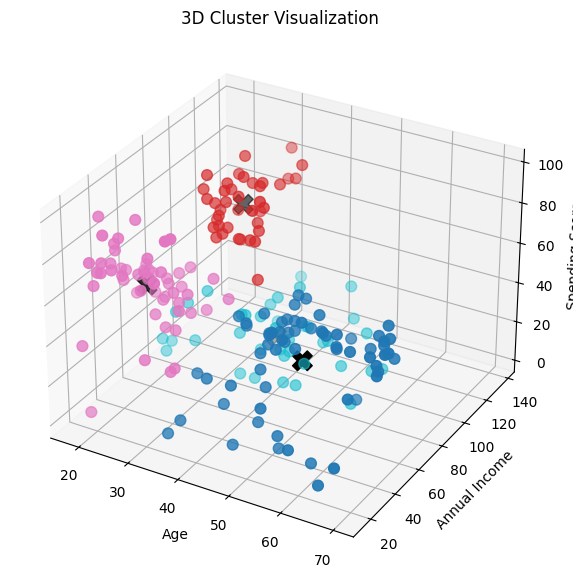

In [174]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df['Age'],
    df['AnnualIncome'],
    df['SpendingScore'],
    c=df['cluster'],
    cmap='tab10',
    s=60
)

# Add centroids
ax.scatter(
    centroid_df['Age'],
    centroid_df['AnnualIncome'],
    centroid_df['SpendingScore'],
    color='black',
    marker='X',
    s=200
)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.set_title('3D Cluster Visualization')

plt.show()


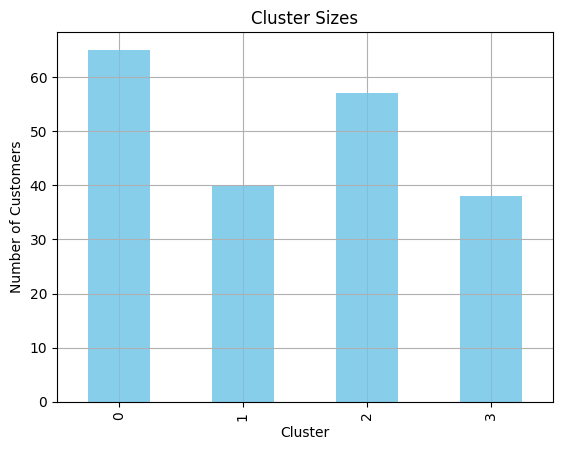

In [175]:
df['cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


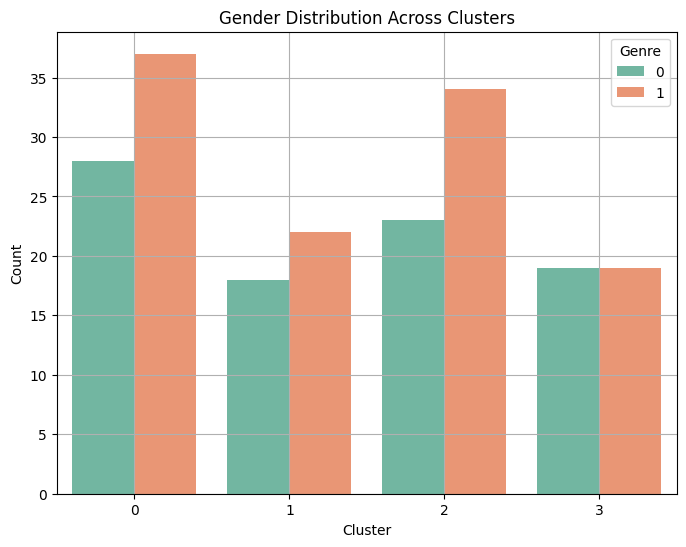

In [178]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='cluster', hue='Genre', palette='Set2')
plt.title('Gender Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [180]:
gender_cluster = pd.crosstab(df['cluster'], df['Genre'], normalize='index') * 100
gender_cluster.round(1)

Genre,0,1
cluster,,
0,43.1,56.9
1,45.0,55.0
2,40.4,59.6
3,50.0,50.0


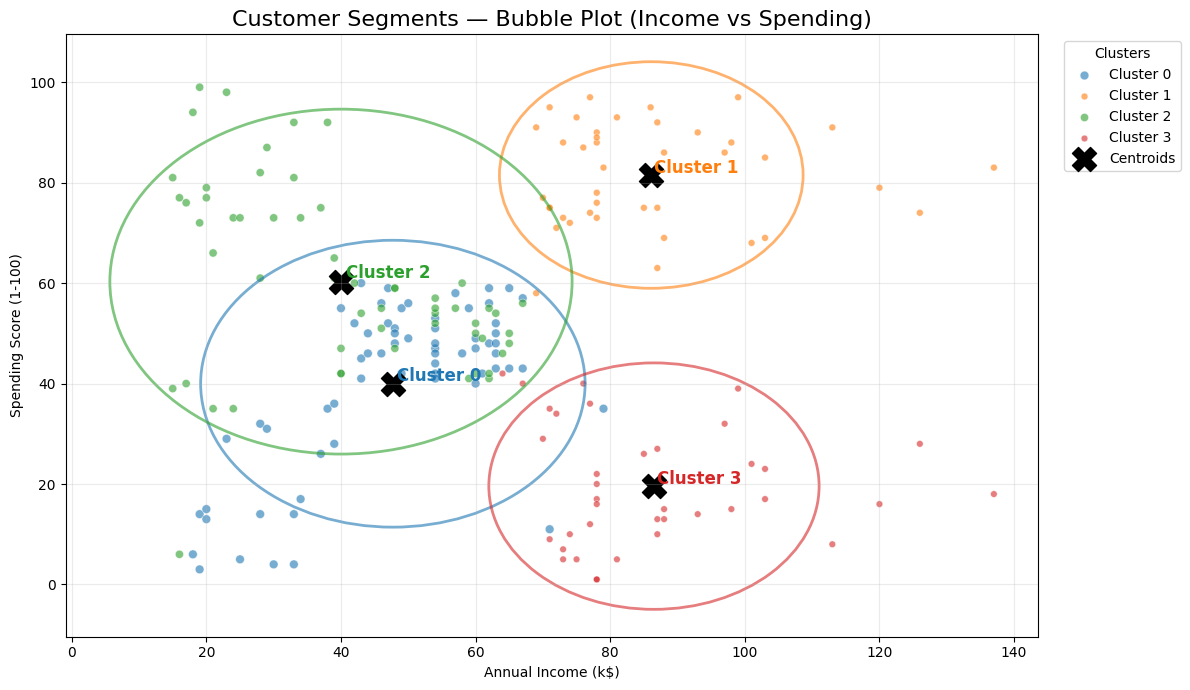

In [185]:
# Bubble-style cluster plot with cluster circles & labels
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# params (tweak to taste)
plt.figure(figsize=(12,7))
palette = sns.color_palette("tab10", n_colors=df['cluster'].nunique())
clusters = sorted(df['cluster'].unique())

# compute cluster sizes for marker scaling
cluster_sizes = df['cluster'].value_counts().sort_index()
# scale factor for bubble sizes (adjust if bubbles too big/small)
size_scale = 40

# plot points: one color per cluster, size by relative cluster density
for i, c in enumerate(clusters):
    sub = df[df['cluster'] == c]
    sizes = np.repeat(cluster_sizes.loc[c], len(sub))  # same size for all pts in cluster
    plt.scatter(
        sub['AnnualIncome'],
        sub['SpendingScore'],
        s=sizes * size_scale / cluster_sizes.max(),   # normalized marker sizes
        c=[palette[i]],
        alpha=0.6,
        edgecolors='w',
        linewidth=0.5,
        label=f'Cluster {c}'
    )

# plot centroids
plt.scatter(
    centroid_df['AnnualIncome'],
    centroid_df['SpendingScore'],
    s=300,
    c='black',
    marker='X',
    label='Centroids'
)

# draw translucent circles around clusters (radius chosen from cluster spread)
ax = plt.gca()
for i, c in enumerate(clusters):
    # centroid coordinates
    cx = centroid_df.loc[c, 'AnnualIncome']
    cy = centroid_df.loc[c, 'SpendingScore']

    # approximate radius: use 75th percentile distance from centroid in that cluster
    pts = df[df['cluster'] == c][['AnnualIncome', 'SpendingScore']].values
    if len(pts) > 1:
        dists = np.sqrt(((pts - np.array([cx, cy]))**2).sum(axis=1))
        radius = np.percentile(dists, 75) * 1.2  # stretch a little
    else:
        radius = 10  # fallback

    circle = patches.Circle((cx, cy), radius=radius, fill=False,
                            edgecolor=palette[i], linewidth=2, alpha=0.6, linestyle='-')
    ax.add_patch(circle)

    # add cluster label near the circle (offset slightly)
    plt.text(cx + radius*0.02, cy + radius*0.02, f'Cluster {c}', fontsize=12, fontweight='bold', color=palette[i])

# polish plot
plt.title('Customer Segments — Bubble Plot (Income vs Spending)', fontsize=16)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(alpha=0.25)
plt.legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()



We found four different customer segments based on Age, Annual Income, and Spending Score after using K-Means Clustering with k = 4.  The insights for each cluster are listed below:

 🔵 Cluster 0: Older  Customers with Low Spending
 Age: approximately 54
 Annual Income: Moderate (around $47k)
 Score for Spending: Low (around 40)
 These customers rarely purchase even though they have moderate income.  They may be price-sensitive or less engaged.

 🟢 Premium High-Income High Spenders: Cluster 1
 Age: Around 33 years
 Income per year: extremely high (around $86k)
 Spending Score: Very high (around 82)
 This group of customers is the most valuable.  They prefer high-end goods and spend a lot of money.

 🟡 Cluster 2 – Young Moderate Spenders
 About 25 years old
 Low-to-medium annual income (around $40k)
 Score for Spending: Medium-high (around 60)
 These young customers enjoy shopping but have limited income.

 🔴 Cluster 3: Low Spenders with High Income
 Age: approximately 39 years old; yearly income: extremely high (around $86k)
 Spending Score: extremely low (20)
 These clients make a lot of money, but they don't buy much.  They may prefer other brands or need re-engagement.




#In this project, we used the K-Means clustering algorithm to segment customers. Based on Age, Annual Income, and Spending Score, we identified four meaningful customer groups.

#Businesses can use these segments to better understand customer purchasing behavior, identify premium and high-value customers, develop targeted marketing strategies, and increase customer satisfaction and engagement.

# K-Means demonstrated efficacy in classifying consumers based on shared attributes, enabling data-driven marketing and business strategy decision-making.

